## 数据预处理

清洗了数据，去除掉了异常值，对部分信息进行了编码，将数值取整以便观察

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [67]:
originData = pd.read_csv("crop_yield.csv")
originData.head(5)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251



核心字段包括： 
- Region ：作物种植的地理区域（北、东、南、西） 
- Soil_Type ：种植土壤类型（黏土、沙土、壤土、粉砂、泥炭土、白垩土） 
- Crop ：作物种类（小麦、水稻、玉米、大豆）
- Rainfall_mm ：生长季降雨量（毫米）
- Temperature_Celsius ：生长季平均气温（℃） 
- Fertilizer_Used ：是否施用化肥（是/否） 
- Irrigation_Used ：是否使用灌溉（是/否） 
- Weather_Condition ：主导天气状况（晴天、雨天、多云） 
- Days_to_Harvest ：播种至收获天数 
- Yield_tons_per_hectare ：作物总产量（吨/公顷）

数据来源：https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield/data

In [68]:
originData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [69]:
originData.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [70]:
originData = originData[originData["Yield_tons_per_hectare"]>0]

In [71]:
originData.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,999769.000000,999769.000000,999769.000000,999769.000000
mean,550.077823,27.506079,104.495141,4.650592
std,259.804329,7.220488,25.953328,1.695166
min,100.000896,15.000034,60.000000,0.000411
25%,325.062906,21.256078,82.000000,3.418669
50%,550.229205,27.509509,104.000000,4.652333
75%,774.797949,33.754459,127.000000,5.879576
max,999.998098,39.999997,149.000000,9.963372


Rainfall_mm                  Axes(0.125,0.747241;0.227941x0.132759)
Temperature_Celsius       Axes(0.398529,0.747241;0.227941x0.132759)
Days_to_Harvest           Axes(0.672059,0.747241;0.227941x0.132759)
Yield_tons_per_hectare       Axes(0.125,0.587931;0.227941x0.132759)
dtype: object

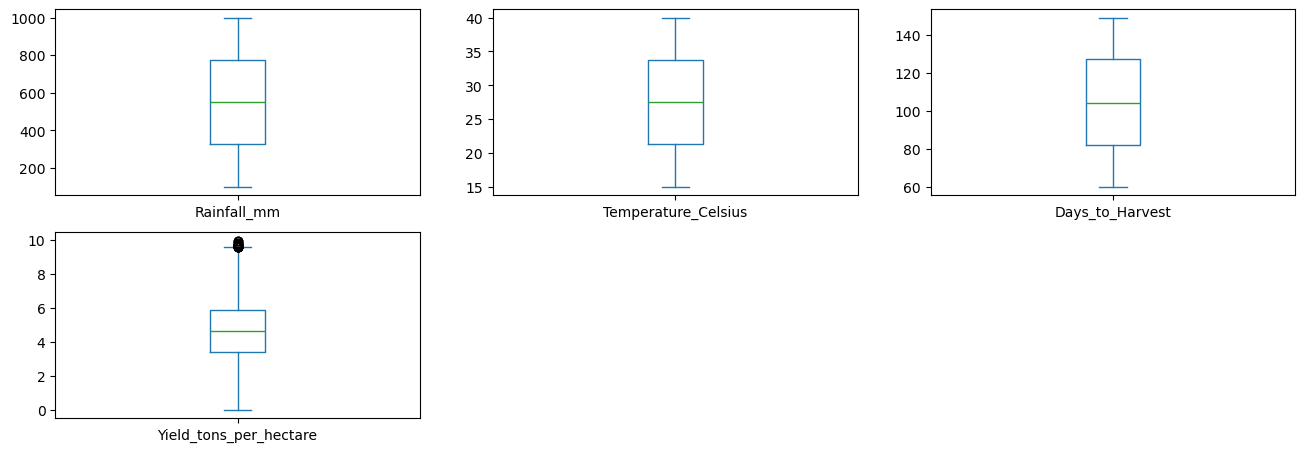

In [72]:
originData.plot(kind='box', subplots=True, layout=(5,3), sharex=False,sharey=False, figsize=(16,14))# 每个特征的箱图

In [73]:
originData["Soil_Type"].value_counts()

Soil_Type
Sandy     167081
Loam      166757
Chalky    166735
Silt      166633
Clay      166311
Peaty     166252
Name: count, dtype: int64

In [74]:
originData.head(3)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443


In [75]:
originData["Crop"].value_counts()

Crop
Maize      166785
Rice       166754
Barley     166727
Wheat      166640
Cotton     166548
Soybean    166315
Name: count, dtype: int64

In [76]:
originData["Weather_Condition"].value_counts()

Weather_Condition
Sunny     333701
Rainy     333491
Cloudy    332577
Name: count, dtype: int64

In [77]:
originData["Fertilizer_Used"].value_counts()

Fertilizer_Used
True     499940
False    499829
Name: count, dtype: int64

In [78]:
originData["Irrigation_Used"].value_counts()

Irrigation_Used
False    500278
True     499491
Name: count, dtype: int64

In [79]:
encoded_data = pd.get_dummies(originData, columns=['Soil_Type'])

In [80]:
encoded_data.head(3)

,Region,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt
0,West,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,False,False,False,False,True,False
1,South,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,False,True,False,False,False,False
2,North,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,False,False,True,False,False,False


In [81]:
encoded_data = pd.get_dummies(encoded_data, columns=['Crop'])

In [82]:
encoded_data = pd.get_dummies(encoded_data, columns=["Weather_Condition"])

In [83]:
encoded_data.head(3)

,Region,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,West,897.077239,27.676966,False,True,122,6.555816,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,South,992.673282,18.026142,True,True,140,8.527341,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,North,147.998025,29.794042,False,False,106,1.127443,False,False,True,...,False,True,False,False,False,False,False,False,False,True


In [87]:
encoded_data.drop(columns='Region',axis=1,inplace=True)

In [88]:
encoded_data

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,992.673282,18.026142,True,True,140,8.527341,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,147.998025,29.794042,False,False,106,1.127443,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
3,986.866331,16.644190,False,True,146,6.517573,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,730.379174,31.620687,True,True,110,7.248251,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302.805345,27.987428,False,False,76,1.347586,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
999996,932.991383,39.661039,True,False,93,7.311594,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
999997,867.362046,24.370042,True,False,108,5.763182,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
999998,492.812857,33.045505,False,False,102,2.070159,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [89]:
encoded_data.astype(int)

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897,27,0,1,122,6,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,992,18,1,1,140,8,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,147,29,0,0,106,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,986,16,0,1,146,6,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,730,31,1,1,110,7,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302,27,0,0,76,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
999996,932,39,1,0,93,7,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
999997,867,24,1,0,108,5,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
999998,492,33,0,0,102,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [95]:
hectare = pd.DataFrame(encoded_data["Yield_tons_per_hectare"])
others = encoded_data.drop(columns="Yield_tons_per_hectare")
hectare.columns = (["hectare"])
hectare


,hectare
0,6.555816
1,8.527341
2,1.127443
3,6.517573
4,7.248251
...,...
999995,1.347586
999996,7.311594
999997,5.763182
999998,2.070159


In [96]:
others

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False
1,992.673282,18.026142,True,True,140,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,147.998025,29.794042,False,False,106,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True
3,986.866331,16.644190,False,True,146,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
4,730.379174,31.620687,True,True,110,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302.805345,27.987428,False,False,76,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
999996,932.991383,39.661039,True,False,93,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
999997,867.362046,24.370042,True,False,108,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
999998,492.812857,33.045505,False,False,102,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True


In [97]:
processed_data = pd.concat([hectare,others],axis=1)

In [101]:
processed_data = processed_data.drop("Days_to_Harvest",axis=1)

In [103]:
processed_data = processed_data.astype(int)

In [105]:
processed_data.to_csv("处理后的农产品数据.csv",index=False)